# World Happiness Report
 The World Happiness Report is a publication of the United Nations Sustainable Development Solutions Network. It contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various (quality of) life factors and they are:
   <br>
   - Gross Domestic Product Per Capita.
   <br>
   - Social Support.
   <br>
   - Healthy life expectancy at birth.
   <br>
   - Freedom to make life choices.
   <br>
   - Generosity.
   <br>
   - Perceptions of corruption.
   <br>
As of December 2021, Finland had been ranked the happiest country in the world four times in a row

## Downloading the Dataset

- Downloading the dataset from Kaggle.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = "https://www.kaggle.com/unsdsn/world-happiness" 

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./world-happiness" (use force=True to force download)


The dataset has been downloaded in device and uploaded.

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "world-happiness-report"

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dhruv171717/world-happiness-report" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dhruv171717/world-happiness-report


'https://jovian.ai/dhruv171717/world-happiness-report'

## Data Preparation and Cleaning

 - Our data has been uploaded and now we will prepare the data for analysis, by removing unwanted rows and columns from the dataset.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Report of 2015

In [10]:
report2015_data = pd.read_csv('HIR-2015.csv')

In [11]:
report2015_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Removing the unwanted columns
- Here we are going to ignore the standard error and region so removing the standard error and region column for efficiency.

In [12]:
report_2015 = report2015_data.drop(['Standard Error','Region'], axis=1)

### Preprocessing columns
- We will rename the columns names for easy to use purpose in this project.
- we will perform function like lower() which will help to convert alphabets in lowercase , replace(" ","_") for space problem.

In [13]:
def preprocess_columns(df):
    df.columns = df.columns.str.replace(" ","_")
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace("(", "")
    df.columns = df.columns.str.replace(")", "")
    return df
report2015 = preprocess_columns(report_2015)

/tmp/ipykernel_152/1958114240.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("(", "")
/tmp/ipykernel_152/1958114240.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(")", "")


In [14]:
report2015

,country,happiness_rank,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


As we can see all alphabets are converted into lowercase in column names.

In [15]:
report2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      158 non-null    object 
 1   happiness_rank               158 non-null    int64  
 2   happiness_score              158 non-null    float64
 3   economy_gdp_per_capita       158 non-null    float64
 4   family                       158 non-null    float64
 5   health_life_expectancy       158 non-null    float64
 6   freedom                      158 non-null    float64
 7   trust_government_corruption  158 non-null    float64
 8   generosity                   158 non-null    float64
 9   dystopia_residual            158 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.5+ KB


- As we can see our dataset is complete there are no missing values in it so no need to handle missing data.
- All values are present in float and integer so need to alter that for visualization.

Similarly we will analyse report of 2019 for comparision between 2015 and 2019 report in analysis.

### Report of 2019

In [16]:
report2019_data = pd.read_csv('HIR-2019.csv')

In [17]:
report2019_data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [18]:
report_2019 = report2019_data.drop(['Social support'], axis=1)

In [19]:
report_2019

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.105,0.225,0.235,0.035


In [20]:
def preprocess_columns(df):
    df.columns = df.columns.str.replace(" ","_")
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace("(", "")
    df.columns = df.columns.str.replace(")", "")
    return df
report2019 = preprocess_columns(report_2019)

/tmp/ipykernel_152/1764745770.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("(", "")
/tmp/ipykernel_152/1764745770.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(")", "")


In [21]:
report2019

,overall_rank,country_or_region,score,gdp_per_capita,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.105,0.225,0.235,0.035


In [22]:
report2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  156 non-null    int64  
 1   country_or_region             156 non-null    object 
 2   score                         156 non-null    float64
 3   gdp_per_capita                156 non-null    float64
 4   healthy_life_expectancy       156 non-null    float64
 5   freedom_to_make_life_choices  156 non-null    float64
 6   generosity                    156 non-null    float64
 7   perceptions_of_corruption     156 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.9+ KB


- 2019 report is also a complete dataset and all values are in int and float, so need to alter it.

Now, we will move to next step i.e. visualization and analysis.

In [23]:
import jovian

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dhruv171717/world-happiness-report" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dhruv171717/world-happiness-report


'https://jovian.ai/dhruv171717/world-happiness-report'

## Exploratory Analysis and Visualization

Now our dataset is ready for visualizing and finding the meaningful insights from it.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
! pip install plotly --quiet

In [26]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Report of 2015 

In [28]:
r_2015= dict(type='choropleth',
                locations = report2015['country'],
                locationmode='country names',
                colorscale= "greens",
                text= report2015['country'],
                z = report2015['happiness_score'],
                colorbar={'title':'Happiness Score'})
figure2015 = dict(title='2015 World Happiness Score', geo=dict(showframe=True, projection={'type':'natural earth'}))
choromap = go.Figure(data=[r_2015], layout = figure2015)
iplot(choromap)

- Just by pointing at any country in a globe we can know the happiness score of that country

We can also observe that Asia and Africa continent have the least happiness score compare to others.

### Report of 2019

In [29]:
r_2019 = dict(type='choropleth',
             locations = report2019['country_or_region'],
             locationmode='country names',
             colorscale = "greens",
             text = report2019['country_or_region'],
             z = report2019['score'],
             colorbar = {'title':'Happiness score'})
figure2019 = dict(title='2019 World Happiness Score', geo= dict(showframe=True, projection={'type':'natural earth'}))
choromap = go.Figure(data=[r_2019], layout=figure2019)
iplot(choromap)

### Correlation Matrix 2015 

- From now on, we are just going to take dataset of 2015

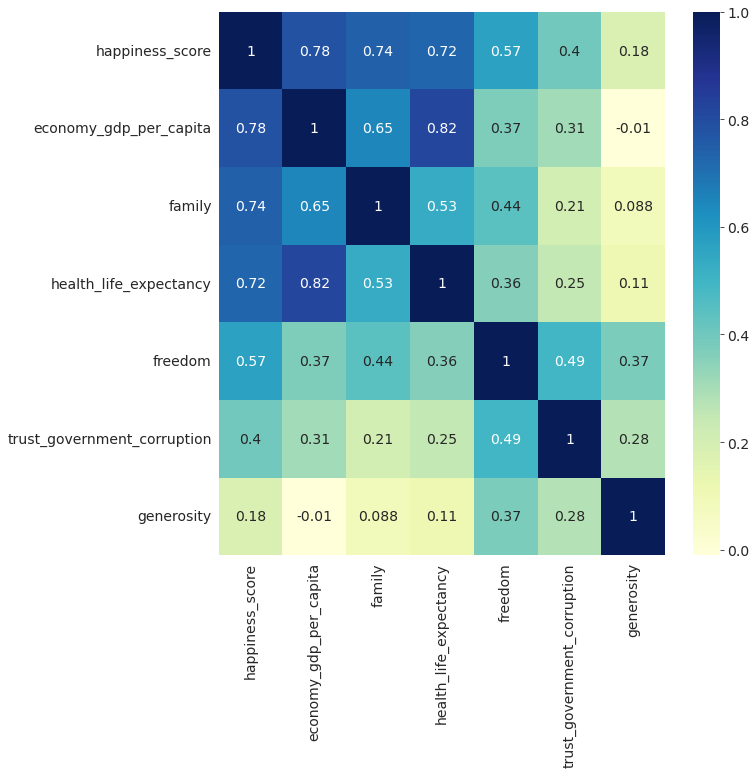

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data=report2015[['happiness_score','economy_gdp_per_capita','family','health_life_expectancy','freedom','trust_government_corruption','generosity']].corr(),annot=True, cmap="YlGnBu")
plt.show()

- Highest correlation with happiness score is : economy_gdp_per_capita(0.78) > family(0.65) >	health_life_expectancy(0.53).
- But we can observe that economy_gdp_per_capita and health_life_expectancy has highest correlation i.e. 0.82.
- From above correlation matrix, we can assume that happiness is highly dependent on gdp, family and health.

Now we will find the individual relationship through scatter plot

## Scatter plot distribution 

### economy_gdp_per_capita, family, health_life_expectancy  vs happiness score

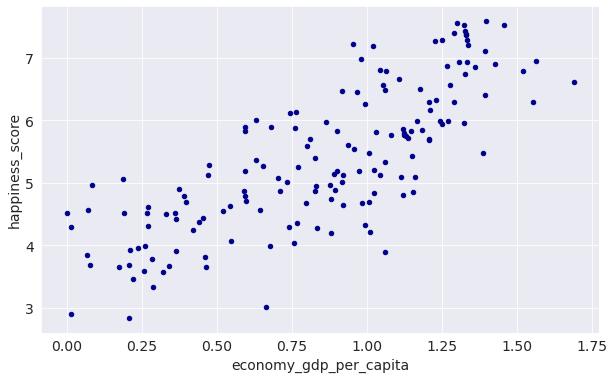

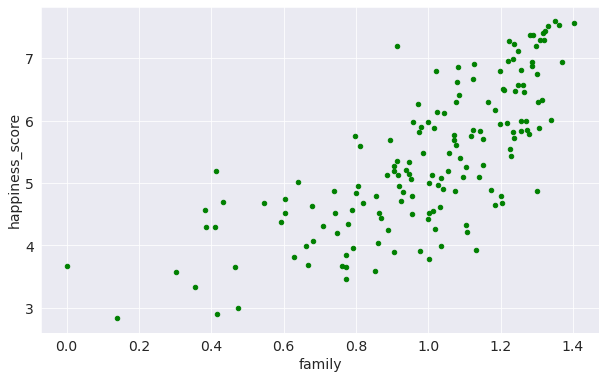

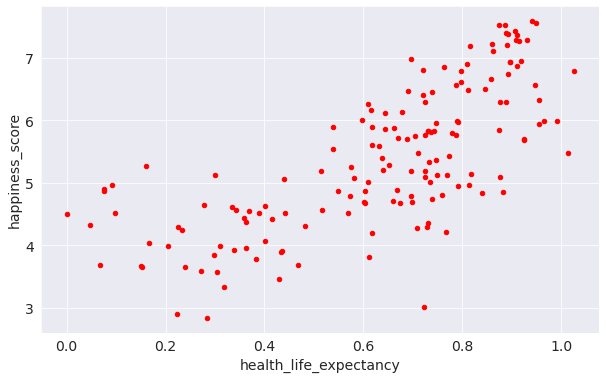

In [31]:
figure  = report2015.plot.scatter(x = 'economy_gdp_per_capita', y= 'happiness_score', c='DarkBlue')
figure  = report2015.plot.scatter(x = 'family', y= 'happiness_score', c='Green')
figure  = report2015.plot.scatter(x = 'health_life_expectancy', y= 'happiness_score', c='Red')

- As we can see that how gdp is forming linear line with happiness score followed by family and health_life_expectancy.

### economy_gdp_per_capita vs health_life_expectancy

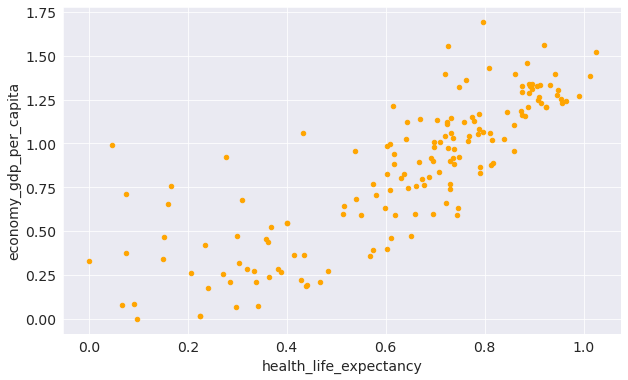

In [32]:
figure  = report2015.plot.scatter(x = 'health_life_expectancy', y= 'economy_gdp_per_capita', c='Orange')

- economy_gdp_per_capita vs health_life_expectancy has correlation of 0.84.
- More perfect the linear line is more the correlation is formed by them (i.e. highly correlated)

### generosity vs economy_gdp_per_capita

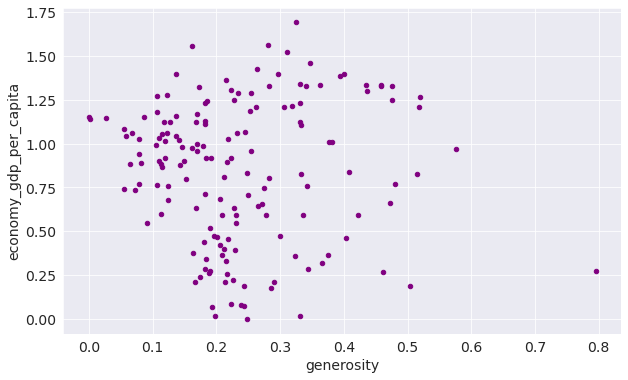

In [33]:
figure  = report2015.plot.scatter(x = 'generosity', y= 'economy_gdp_per_capita', c='Purple')

- As we can see there is no proper linear line is formed between these two, so we can say that they are weakly correlated
- The least correlated columns are generosity vs economy_gdp_per_capita

Let us save and upload our work to Jovian before continuing

In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dhruv171717/world-happiness-report" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dhruv171717/world-happiness-report


'https://jovian.ai/dhruv171717/world-happiness-report'

## Asking and Answering Questions

#### Q1: Which are the Top 5 Happiest countries in the world

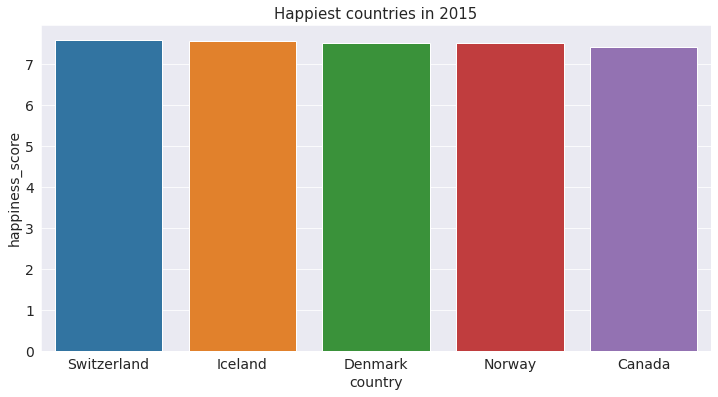

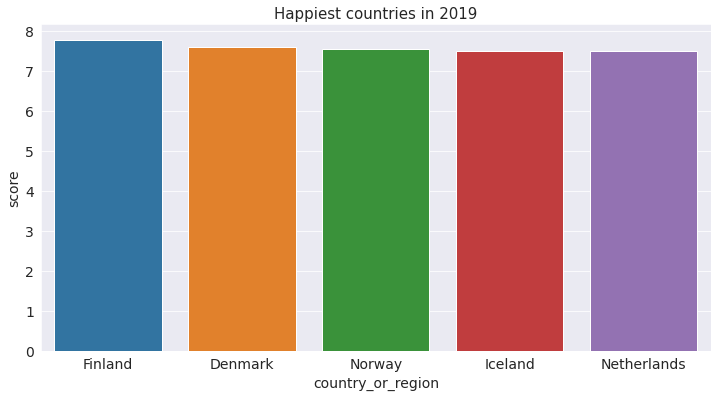

In [36]:
#for 2015
happiest_countries = report2015.iloc[:5]
plt.figure(figsize=(12,6))
sns.barplot(x = happiest_countries["country"], y=report2015["happiness_score"])
plt.title("Happiest countries in 2015", size=15)
plt.show()
#for 2019
happiest_countries19 = report2019.iloc[:5]
plt.figure(figsize=(12,6))
sns.barplot(x = happiest_countries19["country_or_region"], y=report2019["score"])
plt.title("Happiest countries in 2019", size=15)
plt.show()

Top 5 happiest countries in 2015 are:
1. Switzerland
2. Iceland
3. Denmark
4. Norway
5. Canada

- All have happiness score more than or equal to 7.0

Top 5 happiest countries in 2019 are:
1. Finland
2. Denmark
3. Norway
4. Iceland
5. Netherlands

- Finland happiness score increased exponentially in this four years and made it to the top.

#### Q2: gdp of top 5 happiest countries

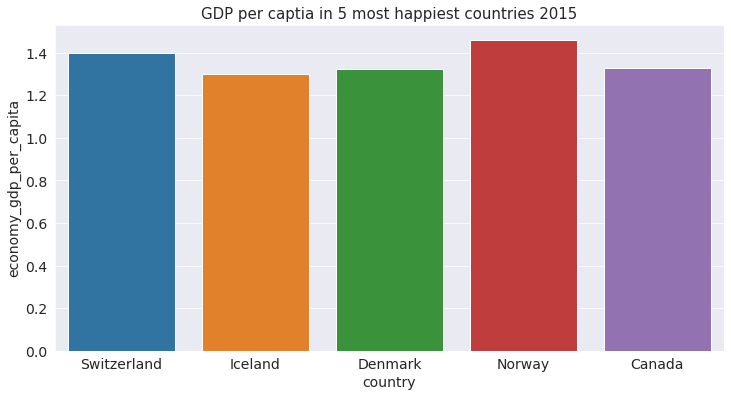

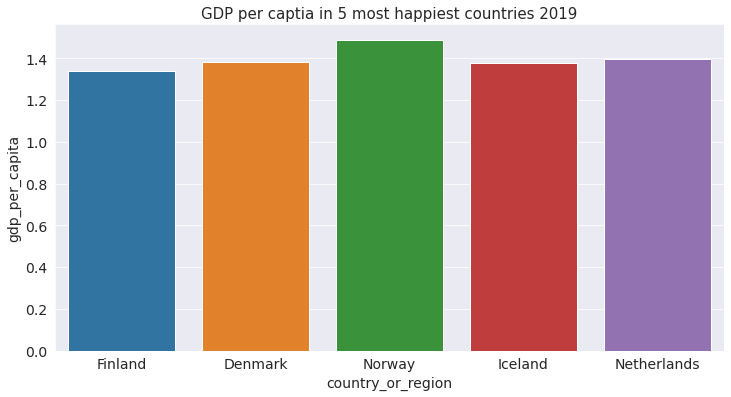

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x=happiest_countries["country"], y = report2015["economy_gdp_per_capita"])
plt.title("GDP per captia in 5 most happiest countries 2015", size=15)
plt.show()
#for 2019
plt.figure(figsize=(12,6))
sns.barplot(x=happiest_countries19["country_or_region"], y = report2019["gdp_per_capita"])
plt.title("GDP per captia in 5 most happiest countries 2019", size=15)
plt.show()

In 2015 & 2019,<br>
Norway has the highest gdp amongst the top 5 happiest country in the world.




#### Q3: Which are the Least happy countries in the world?

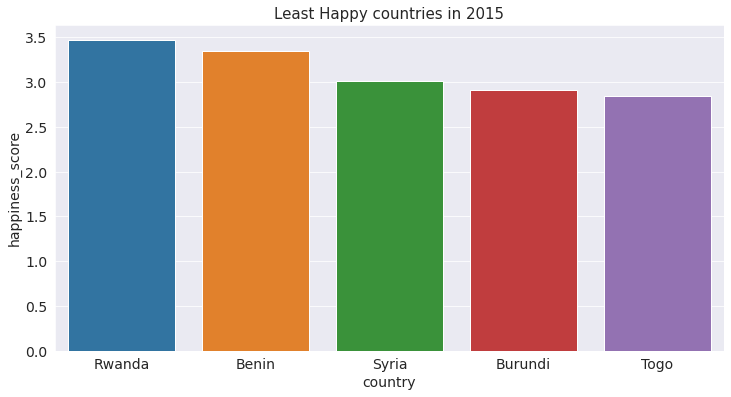

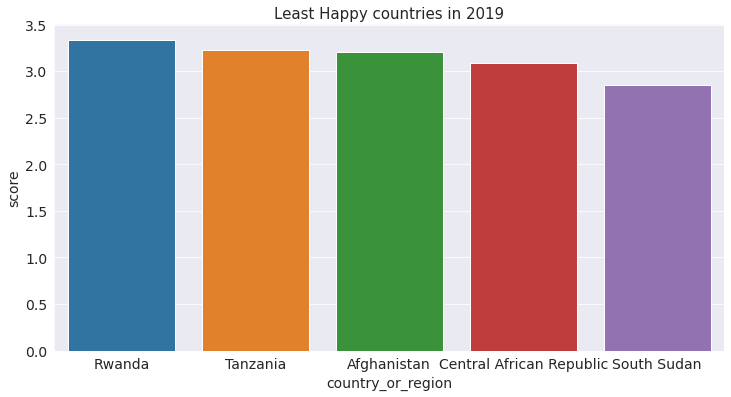

In [38]:
#for 2015
least_happy_countries = report2015.iloc[-5:]
plt.figure(figsize=(12,6))
sns.barplot(x = least_happy_countries["country"], y=report2015["happiness_score"])
plt.title("Least Happy countries in 2015", size=15)
plt.show()
#for 2019
least_happy_countries19 = report2019.iloc[-5:]
plt.figure(figsize=(12,6))
sns.barplot(x = least_happy_countries19["country_or_region"], y=report2019["score"])
plt.title("Least Happy countries in 2019", size=15)
plt.show()

Least happy country in world(2015)
- Togo is least happy country in the world with happiness score of less than 3.0

Least happy country in world(2019)
- South Sudan is least happy country in the world (2019).

#### Q4: Is India Happiness score increased or decreased in span of four years(i.e. 2015 to 2019)?

In [39]:
# In 2015
rank_2015 = report2015.loc[report2015['country'].str.contains("India", case=False)]
rank_2015

,country,happiness_rank,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
116,India,117,4.565,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


In [40]:
# In 2019
rank_2019 = report2019.loc[report2019['country_or_region'].str.contains("India", case=False)]
rank_2019

,overall_rank,country_or_region,score,gdp_per_capita,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
139,140,India,4.015,0.755,0.588,0.498,0.2,0.085


- India's happiness score has decreased from 4.56 to 4.01 in span of four years.
<br>
- India's rank has been shifted to 140 from 116.
<br>
- Here we can see that despite increasing in gdp, health, freedom still our happiness score got decreased this might happen due to calculating happiness score differently in 2019 like adding some more factors into it. 

#### Q5: Happiness factors in India

In [41]:
#for 2015
india = list(report2015.loc[116])
india

['India',
 117,
 4.565,
 0.64499,
 0.38174,
 0.51529,
 0.39786,
 0.08492,
 0.26475,
 2.27513]

In [42]:
#removing unwanted columns
del india[0:3]
india.pop()
india

[0.64499, 0.38174, 0.51529, 0.39786, 0.08492, 0.26475]

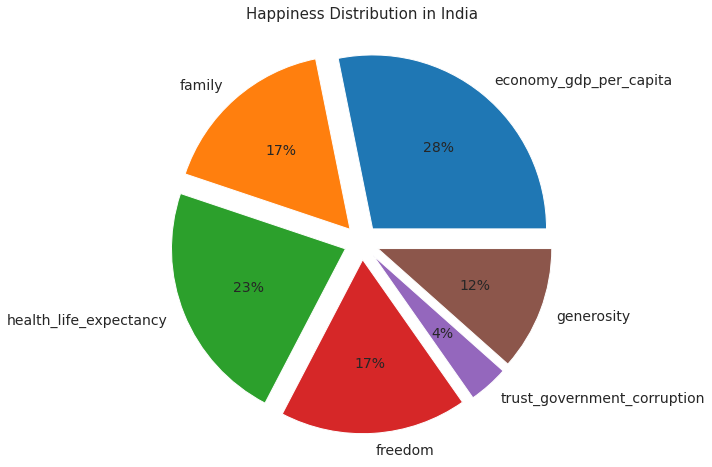

In [43]:
labels = list(report2015.columns)
del labels[0:3]
labels.pop()
explode = (0.1,0.1,0.1,0.1,0.1,0.1)
plt.figure(figsize=(10,8))
plt.title("Happiness Distribution in India", fontsize=15)
plt.pie(x= india, labels=labels, explode=explode, autopct='%1.0f%%')
plt.show()

- Indias happiness is majorly depended on gdp just like world data..

### Is overall world's happiness score increased/ decreased by time?

In [44]:
average_score_2015 = report2015['happiness_score'].mean()
average_score_2015

5.3757341772151905

In [45]:
average_score_2019 = report2019['score'].mean()
average_score_2019

5.407096153846153

- Here overall happiness score in the world increased by 0.03 in span of four years.

Let us save and upload our work to Jovian before continuing.

In [46]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Inferences and Conclusion
We have derived some meaningful insights from World Happiness Report and we can use this insights for further analysis of World Happiness Report in depth.

### Conclusion of our analysis is:
From World Happiness Report of 2015 & 2019, we can conclude that-
   - Asia and Africa continent have the least happiness score compare to others.
   - Highest correlation with happiness score is : economy_gdp_per_capita(0.78) > family(0.65) > health_life_expectancy(0.53).
   - economy_gdp_per_capita and health_life_expectancy has highest correlation i.e. 0.82.
   - From correlation matrix, we can assume that happiness is highly dependent on gdp, family and health.
   - The least correalted columns are generosity vs economy_gdp_per_capita.
   - Top 5 Happiest countries in the world have  happiness score more than or equal to 7.0.
   - Finland happiness score increased exponentially in this four years and made it to the top.
   - In 2015 & 2019, Norway has the highest gdp amongst the top 5 happiest country in the world.
   - In 2015, Togo was least happy country in the world with happiness score of less than 3.0.
   - India's happiness score has decreased from 4.56 to 4.01 in span of four years.
   - India's rank has been shifted to 140 from 116.
   - India's happiness is majorly depended on gdp just like world data.
   - overall happiness score in the world has increased by 0.03 from 2015 to 2019.




In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

Dataset used- "https://www.kaggle.com/unsdsn/world-happiness"

In [ ]:
import jovian

In [ ]:
jovian.commit()